In [6]:
import os
import openai

from openai import OpenAI

In [7]:
client = OpenAI()

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Function to display image from a given URL
def show_image_from_url(url):
    response = requests.get(url)                # Send a GET request to the image URL
    img = Image.open(BytesIO(response.content)) # Open the image from the bytes in the response
    plt.imshow(img)                             # Use Matplotlib to display the image
    plt.axis('off')                             # Hide the axis to only show the image
    plt.show()

In [3]:
# Saving image from the original prompt
import requests

def save_image_from_url(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:  # Check if the request was successful
        with open(file_path, 'wb') as f:  # Open a file in binary write mode
            f.write(response.content)  # Write the content of the response to the file
        print(f"Image saved at {file_path}")
    else:
        print(f"Error: Unable to retrieve image. Status code: {response.status_code}")

In [24]:
name="Subramani"
age=10
superhero="Goku from dragon ball z"
ethinicity="Indian"
morals="Savior"

response = client.images.generate(
  model="dall-e-3",
  prompt=f"Child superhero magazine cover for the child named {name} aged : {age} years old who likes \
  {superhero}, and belongs to {ethinicity} origin. Make sure for it to be containing morals of {morals}. This should be a book preview, to be directly used on a book cover",
  size="1024x1024",
  quality="standard",
  n=1,
)

image_url = response.data[0].url

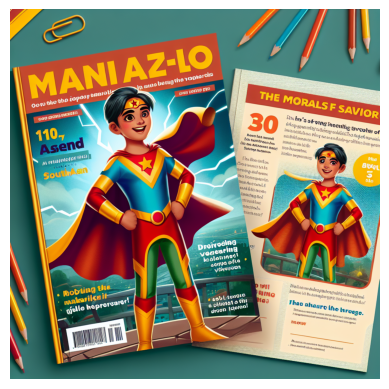

In [25]:
show_image_from_url(image_url)

In [23]:
save_image_from_url(image_url, "test_img.jpg")

Image saved at test_img.jpg
